In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import nltk
from nltk.corpus import twitter_samples
import numpy as np
import pandas as pd

In [2]:
import tweepy
import matplotlib.pyplot as plt
from  textblob import TextBlob 
import time

In [4]:
## all 4 authentication keys to access twitter API
# to connect as OAth handler or jump serever / revers proxy server
consumer_key = "your_consumer_key"
consumer_sec = "your_consumer_sec"


# from proxy server we need to connect
access_token = "your_access_token"
access_token_sec = "your_access_token_sec"

# connected to jump server of twitter
auth=tweepy.OAuthHandler(consumer_key,consumer_sec)

# now we can connect from jump server to web server of twitter
auth.set_access_token(access_token,access_token_sec)

# now we can connect to API storge server of twitter
api_connect=tweepy.API(auth)

# now you can search any topic on twitter
tweet_data=api_connect.search_tweets('China',count=100)



In [5]:
nltk.download('twitter_samples') #downloading twitter dataset

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\SHIKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

info about training testing data  #review later

In [6]:
train_test_tweets=twitter_samples.strings('tweets.20150430-223406.json')

print("Number of train_test tweets : " , len(train_test_tweets))

print()

#Example

print("Example : " , train_test_tweets[896])

Number of train_test tweets :  20000

Example :  @mrmarksteel @CraigFitzsimon1 e.g. the #sun..English version vote #Tory...Scottish version #VoteSNP ...


In [7]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Info about positive and negative tweets

In [8]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

print('\n')
#Examples

alltweets=all_positive_tweets+all_negative_tweets

print("Positive Tweet Example:")
print(all_positive_tweets[0])

print("\nNegative Tweet Example:")
print(all_negative_tweets[65])

print(len(alltweets))



Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


Positive Tweet Example:
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Negative Tweet Example:
cant find the only book that keeps me sane :((
10000


In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings


Remove hyperlinks, Twitter marks and styles
We do not want to use every word in a tweet because many tweets have hashtags, retweet marks, and hyperlinks. We will use regular expressions to remove them from a tweet.

In [10]:
def remove_hyperlinks_marks_styles(tweet):
    
    # remove old style retweet text "RT"
    new_tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    new_tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', new_tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    new_tweet = re.sub(r'#', '', new_tweet)
    
    return new_tweet

Tokenize the string
To tokenize means to split a string into individual words.

In [11]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenize_tweet(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens

Remove stop works and punctuations
Remove stop words and punctuations. Stop words are words that don't add significant meaning to the text. For example, 'i' and 'me'.

In [12]:
nltk.download('stopwords')

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHIKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming
The process of converting a word to its most general form, or stem.

learning -> learn

learned -> learn

learnt -> learn

In [13]:
stemmer = PorterStemmer()

def get_stem(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

implementation of preprocessing funcions on a example tweet

In [14]:
tweet_example = all_positive_tweets[2277]
print(tweet_example)

processed_tweet = remove_hyperlinks_marks_styles(tweet_example)
print("\nRemoved hyperlinks, Twitter marks and styles:")
print(processed_tweet)

tweet_tokens = tokenize_tweet(processed_tweet)
print("\nTokenize the string:")
print(tweet_tokens)

tweets_clean = remove_stopwords_punctuations(tweet_tokens)
print("\nRemove stop words and punctuations:")
print(tweets_clean)

tweets_stem = get_stem(tweets_clean)
print("\nGet stem of each word:")
print(tweets_stem)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

Removed hyperlinks, Twitter marks and styles:
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

Tokenize the string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Remove stop words and punctuations:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Get stem of each word:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


Combine all preprocess techniques

In [15]:
def process_tweet(tweet):
    
    processed_tweet = remove_hyperlinks_marks_styles(tweet)
    tweet_tokens = tokenize_tweet(processed_tweet)
    tweets_clean = remove_stopwords_punctuations(tweet_tokens)
    tweets_stem = get_stem(tweets_clean)
    
    return tweets_stem

In [16]:
tweet_example = all_negative_tweets[105]
print(tweet_example)

processed_tweet = process_tweet(tweet_example)
print(processed_tweet)

@subharrie ohh no :(( and yeah i hope she comes back soon too
['ohh', ':(', 'yeah', 'hope', 'come', 'back', 'soon']


Split data into two pieces, one for training and one for testing

In [17]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [42]:
#df.to_csv('tweets10000.csv', index=False,header=True)

Frequency dictionary 

In [18]:
def create_frequency(tweets, ys):
    
    freq_d = {}
    for tweet,y in zip(tweets,ys):
        for word in process_tweet(tweet):
            pair=(word,y)
            freq_d[pair]=freq_d.get(pair,0)+1
    
    return freq_d

In [19]:
# testing function

tweets = ['i am happy',
          'i am tricked', 'i am tired but happy', 'i am tired', 'today was a tiring day']
ys = [1, 0, 1, 0, 0]

freq_d = create_frequency(tweets, ys)
print(freq_d)

{('happi', 1): 2, ('trick', 0): 1, ('tire', 1): 1, ('tire', 0): 2, ('today', 0): 1, ('day', 0): 1}


In [20]:
# build the freqs dictionary

freqs = create_frequency(train_x, train_y)

freqs

{('followfriday', 1.0): 23,
 ('top', 1.0): 30,
 ('engag', 1.0): 7,
 ('member', 1.0): 14,
 ('commun', 1.0): 27,
 ('week', 1.0): 72,
 (':)', 1.0): 2847,
 ('hey', 1.0): 60,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 80,
 ('call', 1.0): 27,
 ('contact', 1.0): 4,
 ('centr', 1.0): 1,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 6,
 ('assist', 1.0): 1,
 ('mani', 1.0): 28,
 ('thank', 1.0): 504,
 ('listen', 1.0): 14,
 ('last', 1.0): 39,
 ('night', 1.0): 55,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 41,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 15,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 57,
 ('blue', 1.0): 8,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 4,
 ('profil', 1.0): 2,
 ('15', 1.0): 4,
 ('day', 1.0): 187,
 ('one', 1.0): 90,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 16,
 ('like', 1.0): 187,
 ('keep', 1.0): 55,
 ('love', 1.0): 336,
 

In [21]:
len(freqs)

11337

Creating naive bayes model

In [22]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    
    loglikelihood = {}
    logprior = 0
    
    # calculate the number of unique words in vocab
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
    
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        
        # TODO: get N_pos and N_get
        if pair[1]>0:
            N_pos+=freqs[(pair)]
        else:
            N_neg+=freqs[(pair)]
            
    # TODO: calculate the number of documents (tweets)
    D = train_y.shape[0]
    
    # TODO: calculate D_pos, the number of positive documents (tweets)
    D_pos =sum(train_y)
    
    # TODO: calculate D_neg, the number of negative documents (tweets)
    D_neg =D-D_pos
    
    # TODO: calculate logprior
    logprior = np.log(D_pos)-np.log(D_neg)
    
    # for each unique word
    for word in unique_words:
        
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word,1),0)
        freq_neg = freqs.get((word,0),0)
        
        # calculate the probability that word is positive, and negative
        p_w_pos = (freq_pos+1)/(N_pos+V)
        p_w_neg = (freq_neg+1)/(N_neg+V)
        
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood

In [23]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
9085


In [24]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''

    # TODO: process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # TODO: initialize probability to zero
    p = 0

    # TODO: add the logprior
    p += logprior

    for word in word_l:

        # TODO: get log likelihood of each keyword
        if word in loglikelihood:
            p+=loglikelihood[word]

    return p

In [25]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great', 'bad bad bad bad','Shikhar is depressing sad but happy happy ',"how can you be so cunning","i have won but he died in accident"]:
    # print( '%s -> %f' % (tweet, naive_bayes_predict(tweet, logprior, loglikelihood)))
    q = naive_bayes_predict(tweet, logprior, loglikelihood)
#     print(f'{tweet} -> {p:.2f} ({p_category})')
    print(f'{tweet} -> {q:.2f}')

I am happy -> 2.15
I am bad -> -1.29
this movie should have been great. -> 2.14
great -> 2.14
great great -> 4.28
great great great -> 6.41
great great great great -> 8.55
bad bad bad bad -> -5.18
Shikhar is depressing sad but happy happy  -> -0.13
how can you be so cunning -> 0.00
i have won but he died in accident -> -1.26


In [26]:
pos=0
neg=0
neu=0

# printing line by line
for tweet in tweet_data:
    print(tweet.text)
    print()
    p=naive_bayes_predict(tweet.text , logprior, loglikelihood)
    print(p)
    if (p>0.4):
        print("positive")
        pos+=1
    if(-0.3<=p<=0.4):
        print("neutral")
        neu+=1
    if(p<-0.3):
        print("negative")
        neg+=1


RT @ErikSolheim: The countries at the top want you to think the countries at the bottom are to blame for climate change. 

US  historic emi…

4.4594931754557035
positive
@hyashi_china 更にヤクモのSSを使うと「仲間がクローバーを拾わないようにする」「壁にいっぱい触れる」「天使を友情や仲間で殴って消しておく」が追加されますね

-3.2800966674976433
negative
RT @JatIkhwan: Kenapa Buletin TV3 delete tweet pasal varian baru Covid dari China yang dikesan di Malaysia tu? 💀

0.19366660847801476
neutral
@JISOO_CHINA HAPPY BIRTHDAY JISOO
#ShiningStarJISOODay
#간판올리고_문열어라_지수_생일이다

2.621521076520743
positive
✔ JASA TRANSFER UANG RMB TO IDR / IDR TO RMB
✔ BAYAR UANG KULIAH DI CHINA
 LAINNYA
📲 Hbg Telegram : 0821-88666-534… https://t.co/AD6poaCctp

0.9864354715253487
positive
RT @StephTaitWrites: To be clear: the dangerous variant that is slamming NYC and is about to sweep the US over the next few weeks did **NOT…

3.7724906651019428
positive
RT @bharatjodo: "Hatred is actually blindness and misunderstanding.."

Watch the premiere of this forthright conversation between @

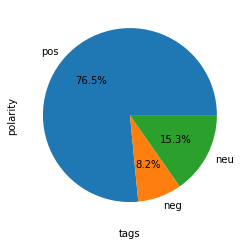

In [27]:
# ploting graphs
plt.xlabel("tags")
plt.ylabel("polarity")
#plt.bar(['pos','neg','neu'],[pos,neg,neu])
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%")
plt.show()